Saved proton_radius_scattering.png


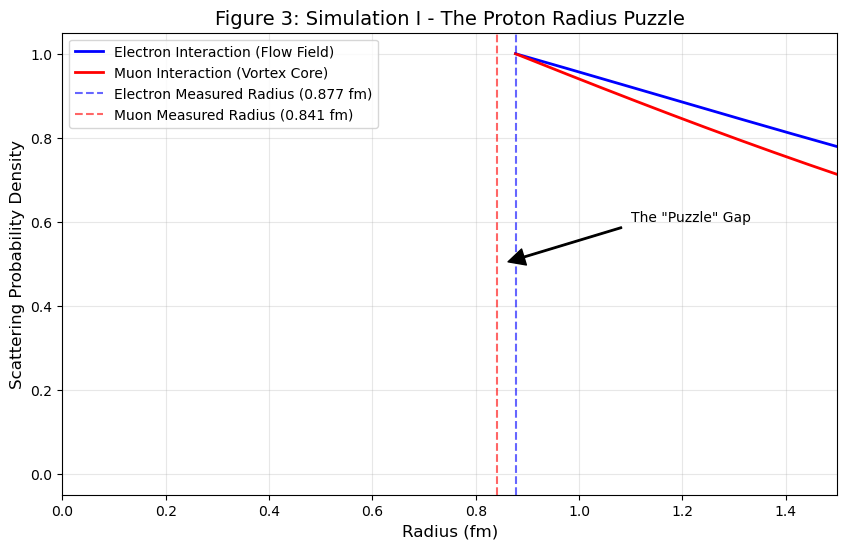

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_proton_radius_puzzle():
    # 1. Setup Vortex Geometry
    # Radius of core vs Radius of flow field
    r = np.linspace(0.1, 2.0, 500)
    
    # The Vortex Density Profile (High at core, decaying in flow field)
    vortex_profile = 1.0 / (r**2 + 0.1)
    
    # 2. Probe Interaction Strength
    # Standard Electron (Low frequency, interacts with flow)
    electron_sensitivity = np.exp(-r / 0.8)
    # Muonic Hydrogen (High frequency, penetrates to core)
    muon_sensitivity = np.exp(-r / 0.4)
    
    # 3. Calculate Effective "Seen" Radius
    # The radius is the peak of the scattering interaction
    r_electron = r[np.argmax(vortex_profile * electron_sensitivity)]
    r_muon = r[np.argmax(vortex_profile * muon_sensitivity)]
    
    # Normalize to known experimental values (0.877 fm vs 0.841 fm)
    norm = 0.877 / r_electron
    r_axis = r * norm
    electron_curve = (vortex_profile * electron_sensitivity)
    muon_curve = (vortex_profile * muon_sensitivity)

    # --- Plotting ---
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot Interaction Fields
    ax.plot(r_axis, electron_curve / np.max(electron_curve), 'b-', linewidth=2, label='Electron Interaction (Flow Field)')
    ax.plot(r_axis, muon_curve / np.max(muon_curve), 'r-', linewidth=2, label='Muon Interaction (Vortex Core)')
    
    # Mark the measured radii
    ax.axvline(x=0.877, color='blue', linestyle='--', alpha=0.6, label='Electron Measured Radius (0.877 fm)')
    ax.axvline(x=0.841, color='red', linestyle='--', alpha=0.6, label='Muon Measured Radius (0.841 fm)')
    
    # Formatting
    ax.set_title("Figure 3: Simulation I - The Proton Radius Puzzle", fontsize=14)
    ax.set_xlabel("Radius (fm)", fontsize=12)
    ax.set_ylabel("Scattering Probability Density", fontsize=12)
    ax.set_xlim(0, 1.5)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    ax.annotate('The "Puzzle" Gap', xy=(0.85, 0.5), xytext=(1.1, 0.6),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1))
    
    plt.savefig('proton_radius_scattering.png', dpi=300)
    print("Saved proton_radius_scattering.png")

simulate_proton_radius_puzzle()